### Your name:

<pre> Your name here</pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


In [234]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### Classification

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {4, 5, 10, 20, 50} 
    - KNN Classfier 
        - tune only: n_neighbors: {3, 5, 10, 20} 
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 5-folds

- Other paramenters -> Use default

# Open data

In [235]:
### Your code here

## Feel free to use multiple cells

df = pd.read_excel("default_of_credit_card_clients.xls", 
                    skiprows= 1, header = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [236]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [237]:
# import matplotlib.pyplot as plt
# df.hist(bins=100, figsize=(20,15))
# plt.show() #optional in Jupyter

# Prepare the data for Machine Learning algorithms

In [238]:
np.random.seed(123)

In [239]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size=0.2, random_state=42)
print("train set shape:", df_train.shape)
print("test set shape:", df_test.shape)

train set shape: (24000, 25)
test set shape: (6000, 25)


In [240]:
default = df_train.drop("default payment next month", axis=1) # drop labels for training set
default_labels = df_train["default payment next month"].copy()
default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21753,21754,80000,2,2,2,24,0,0,0,0,...,78321,73731,39643,39457,3503,5001,2092,1218,1445,878
251,252,30000,1,2,2,28,0,0,0,0,...,29155,25255,22001,0,5006,1244,851,955,0,0
22941,22942,180000,2,5,1,44,0,0,-1,-1,...,850,0,6881,10340,0,850,0,6881,10340,182
618,619,60000,1,1,2,25,0,0,0,0,...,38533,39639,39619,39140,2018,1900,2000,1500,1900,2000
17090,17091,130000,2,2,2,25,0,0,0,0,...,114734,117823,120854,123904,4100,4200,5000,5000,5000,10700


In [241]:
# default['total_PAY'] = df.apply(lambda row: row.PAY_0 + row.PAY_2 + row.PAY_3 + row.PAY_4 + row.PAY_5, axis=1)
# df
X = df.values
print(X)
np.sum(X[:,6:12],axis = 1)

[[     1  20000      2 ...      0      0      1]
 [     2 120000      2 ...      0   2000      1]
 [     3  90000      2 ...   1000   5000      0]
 ...
 [ 29998  30000      1 ...   2000   3100      1]
 [ 29999  80000      1 ...  52964   1804      1]
 [ 30000  50000      1 ...   1000   1000      1]]


array([-2,  3,  0, ...,  8, -1,  0])

In [242]:
from sklearn.base import BaseEstimator,TransformerMixin

# column index
PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 = 6,7,8,9,10 ,11
BILL_ATM_1, BILL_ATM_2, BILL_ATM_3, BILL_ATM_4, BILL_ATM_5, BILL_ATM_6 = 12,13,14,15,16,17
PAY_ATM_1, PAY_ATM_2, PAY_ATM_3, PAY_ATM_4, PAY_ATM_5, PAY_ATM_6  = 18,19,20,21,22,23

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, sum_the_pays = True): # no *args or **kargs
        self.sum_the_pays = sum_the_pays
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        if self.sum_the_pays:
            pay_sum = np.sum(X[:,6:12],axis =1)
            bill_atm_sum = np.sum(X[:,12:18],axis =1)
            pay_atm_sum = np.sum(X[:,18:24],axis =1)
            X_clean = np.delete(X, np.arange(6,24), axis = 1)
            return np.c_[X_clean, pay_sum, pay_atm_sum - bill_atm_sum]
        else:
            return X

attr_adder = CombinedAttributesAdder()
default_extra_attribs = attr_adder.fit_transform(default.values)
default_extra_attribs

array([[  21754,   80000,       2, ...,      24,       0, -369493],
       [    252,   30000,       1, ...,      28,       0, -127104],
       [  22942,  180000,       2, ...,      44,      -4,  -20734],
       ...,
       [    861,   50000,       1, ...,      26,     -12,       0],
       [  15796,   70000,       2, ...,      25,       4, -275473],
       [  23655,  160000,       2, ...,      36,     -12,    1878]])

In [243]:
# define a class/transformer to change panda file to np arrays


class Panda_to_np(BaseEstimator, TransformerMixin):
    def __init__(self,do_transform = True): # no *args or **kargs
        self.do_transform = do_transform
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        return X.values

attr_adder = Panda_to_np()
default_np = attr_adder.fit_transform(default)
default_np.shape

(24000, 24)

In [244]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy="median")), #impute
        ('pd_to_np', Panda_to_np()), #transform panda file to np
        ('attribs_adder', CombinedAttributesAdder()), 
    #then add attributes, since calculate add bedroom per room by default ==> results in a 11 columns array in the end
#          ('minmax_scaler', MinMaxScaler(feature_range=(0, 1))), # then normalize
#         ('Standard_scaler', StandardScaler()) # then normalize
    ])

default_tr = num_pipeline.fit_transform(default) #transform housing_num daata frame to an np array
default_tr

array([[  21754,   80000,       2, ...,      24,       0, -369493],
       [    252,   30000,       1, ...,      28,       0, -127104],
       [  22942,  180000,       2, ...,      44,      -4,  -20734],
       ...,
       [    861,   50000,       1, ...,      26,     -12,       0],
       [  15796,   70000,       2, ...,      25,       4, -275473],
       [  23655,  160000,       2, ...,      36,     -12,    1878]])

In [245]:
import numpy.ma as ma

default_trian_label = ma.make_mask(default_labels.values)
default_trian_label

array([False, False, False, ..., False,  True,  True])

# Implement KNN regression

In [246]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

# Add tol argument to prevent warnings
# sgd_clf = SGDClassifier(max_iter=1000, random_state=42, loss='hinge')
KNN_clf = KNeighborsClassifier(n_neighbors = 40)
KNN_clf.fit(default_tr, default_trian_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [247]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNN_clf, default_tr, default_trian_label, cv=5, scoring="accuracy")

array([0.77608831, 0.77796292, 0.778125  , 0.77828714, 0.77849552])

In [248]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
KNN_y_scores = cross_val_predict(KNN_clf, default_tr, default_trian_label, cv=5, method="predict_proba")

# roc_curve expects true labels (classes) and predicted scores (decision_function)
fpr, tpr, thresholds = roc_curve(default_trian_label, KNN_y_scores[:,1])

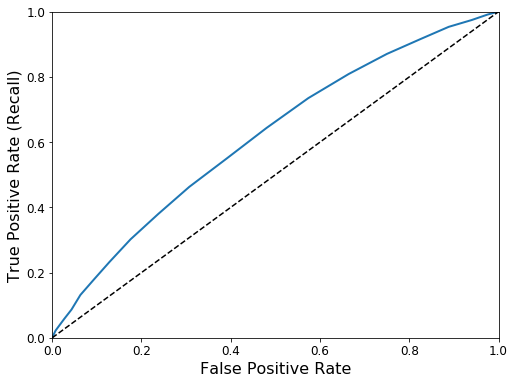

In [249]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
# save_fig("roc_curve_plot")
plt.show()

In [250]:
default_tr.shape

(24000, 8)

In [251]:
sample_weight  = np.ones(default_tr.shape[0])
sample_weight[default_trian_label==True] = 10
sample_weight
default_trian_label

array([False, False, False, ..., False,  True,  True])

In [252]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=123,class_weight = "balanced")


forest_clf.fit(default_tr, default_trian_label,sample_weight=sample_weight)

forest_y_scores = cross_val_predict(forest_clf, default_tr, default_trian_label, cv=5, method="predict_proba")

# roc_curve expects true labels (classes) and predicted scores (decision_function)
fpr2, tpr2, thresholds2 = roc_curve(default_trian_label, forest_y_scores[:,1])

In [231]:
# ?RandomForestClassifier

In [232]:
# from sklearn.ensemble import RandomForestClassifier
# forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
# y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
#                                     method="predict_proba")

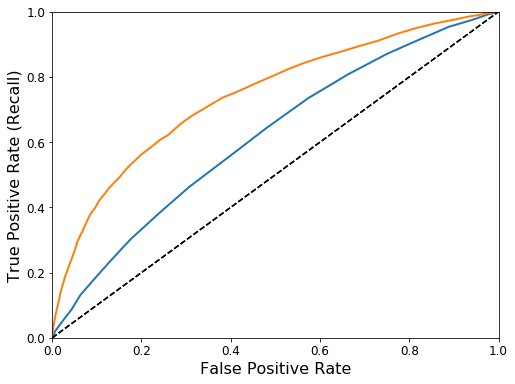

In [253]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plot_roc_curve(fpr2, tpr2)
# save_fig("roc_curve_plot")
plt.show()

In [254]:
from sklearn.metrics import roc_auc_score
roc_auc_score(default_trian_label, KNN_y_scores[:,1])
roc_auc_score(default_trian_label, forest_y_scores[:,1])

0.7426896974884878

 ## Try upsample minority

In [255]:
from sklearn.utils import resample

default_majority = df_train[df_train['default payment next month']==0]
default_minority = df_train[df_train['default payment next month']==1]
default_majority.shape
df_minority_upsampled = resample(default_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=default_majority.shape[0],    # to match majority class
                                 random_state=42) # reproducible results
df_train_upsampled = pd.concat([default_majority, df_minority_upsampled])
df_train_upsampled['default payment next month'].value_counts()

1    18677
0    18677
Name: default payment next month, dtype: int64

In [256]:
default_US = df_train_upsampled.drop("default payment next month", axis=1) # drop labels for training set
default_US_labels = df_train_upsampled["default payment next month"].copy()

In [257]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy="median")), #impute
        ('pd_to_np', Panda_to_np()), #transform panda file to np
        ('attribs_adder', CombinedAttributesAdder()), 
    #then add attributes, since calculate add bedroom per room by default ==> results in a 11 columns array in the end
#          ('minmax_scaler', MinMaxScaler(feature_range=(0, 1))), # then normalize
        ('Standard_scaler', StandardScaler()) # then normalize
    ])

default_tr_US = num_pipeline.fit_transform(default_US) #transform housing_num daata frame to an np array
default_tr_US.shape

(37354, 8)

In [258]:
import numpy.ma as ma

default_trian_US_label = ma.make_mask(default_US_labels.values)
default_trian_US_label
# default_trian_US_label[default_trian_US_label == True].shape

array([False, False, False, ...,  True,  True,  True])

In [259]:
from sklearn.ensemble import RandomForestClassifier
forest_clf_US = RandomForestClassifier(n_estimators=100, random_state=123)
forest_clf_US.fit(default_tr_US, default_trian_US_label)

forest_y_scores_US = cross_val_predict(forest_clf_US, default_tr_US, default_trian_US_label, cv=5, method="predict_proba")

# roc_curve expects true labels (classes) and predicted scores (decision_function)
fpr3, tpr3, thresholds3 = roc_curve(default_trian_US_label, forest_y_scores_US[:,1])
roc_auc_score(default_trian_US_label, forest_y_scores_US[:,1])

0.979114492363994

In [260]:
default_tr_US.shape

(37354, 8)

In [261]:
default_trian_US_label.sum()/default_trian_US_label.shape[0]

0.5

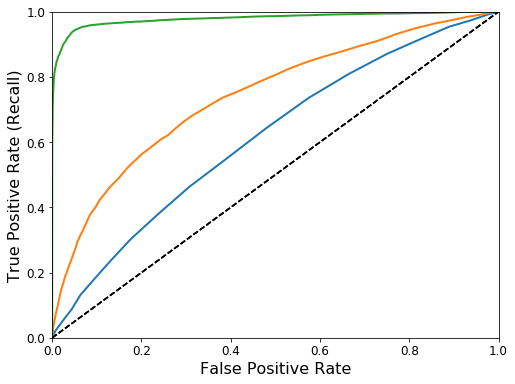

In [262]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plot_roc_curve(fpr2, tpr2)
plot_roc_curve(fpr3, tpr3)
# save_fig("roc_curve_plot")
plt.show()

In [263]:
KNN_clf_US = KNeighborsClassifier(n_neighbors = 40)
KNN_clf_US.fit(default_tr_US, default_trian_US_label)
KNN_y_scores_US = cross_val_predict(KNN_clf_US, default_tr_US, default_trian_US_label, cv=5, method="predict_proba")

# roc_curve expects true labels (classes) and predicted scores (decision_function)
fpr4, tpr4, thresholds4 = roc_curve(default_trian_US_label, KNN_y_scores_US[:,1])

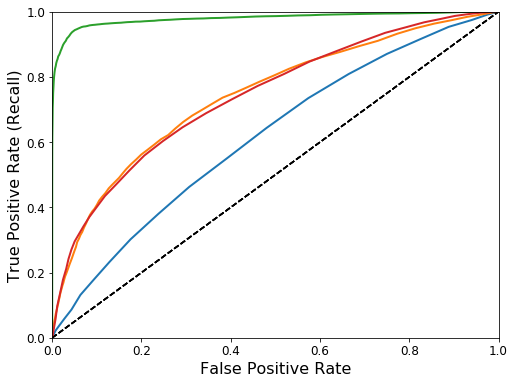

In [264]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plot_roc_curve(fpr2, tpr2)
plot_roc_curve(fpr3, tpr3)
plot_roc_curve(fpr4, tpr4)
# save_fig("roc_curve_plot")
plt.show()

In [265]:
from sklearn.linear_model import LogisticRegression
log_reg_US = LogisticRegression(solver = 'lbfgs',class_weight = 'balanced')
log_reg_US.fit(default_tr_US, default_trian_US_label)
log_y_scores_US = cross_val_predict(log_reg_US, default_tr_US, default_trian_US_label, cv=5, method="predict_proba")

# roc_curve expects true labels (classes) and predicted scores (decision_function)
fpr5, tpr5, thresholds5 = roc_curve(default_trian_US_label, log_y_scores_US[:,1])

In [266]:
x = [1,1,1,1,1,1,0,0,0,0]
sample_weights = [1,1,1,1,1,1,2,2,2]
?log_reg_US.fit

Signature: log_reg_US.fit(X, y, sample_weight=None)
Docstring:
Fit the model according to the given training data.

Parameters
----------
X : {array-like, sparse matrix}, shape (n_samples, n_features)
    Training vector, where n_samples is the number of samples and
    n_features is the number of features.

y : array-like, shape (n_samples,)
    Target vector relative to X.

sample_weight : array-like, shape (n_samples,) optional
    Array of weights that are assigned to individual samples.
    If not provided, then each sample is given unit weight.

    .. versionadded:: 0.17
       *sample_weight* support to LogisticRegression.

Returns
-------
self : object

Notes
-----
The SAGA solver supports both float64 and float32 bit arrays.
File:      /opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py
Type:      method


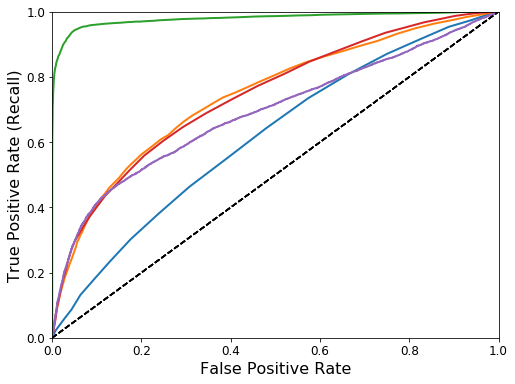

In [267]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plot_roc_curve(fpr2, tpr2)
plot_roc_curve(fpr3, tpr3)
plot_roc_curve(fpr4, tpr4)
plot_roc_curve(fpr5, tpr5)
# save_fig("roc_curve_plot")
plt.show()


In [269]:
default_majority = df_train[df_train['default payment next month']==0]
default_minority = df_train[df_train['default payment next month']==1]
default_majority.shape
df_majority_downsampled = resample(default_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=default_minority.shape[0],    # to match majority class
                                 random_state=42) # reproducible results
df_train_downsampled = pd.concat([default_minority, df_majority_downsampled])
df_train_downsampled['default payment next month'].value_counts()


1    5323
0    5323
Name: default payment next month, dtype: int64

In [270]:
default_DS = df_train_downsampled.drop("default payment next month", axis=1) # drop labels for training set
default_DS_labels = df_train_downsampled["default payment next month"].copy()
default_tr_DS = num_pipeline.fit_transform(default_DS) #transform housing_num daata frame to an np array
default_tr_DS.shape
default_trian_DS_label = ma.make_mask(default_DS_labels.values)
default_trian_DS_label

array([ True,  True,  True, ..., False, False, False])

In [271]:
forest_clf_DS = RandomForestClassifier(n_estimators=100, random_state=123)
forest_clf_DS.fit(default_tr_DS, default_trian_DS_label)

forest_y_scores_DS = cross_val_predict(forest_clf_DS, default_tr_DS, default_trian_DS_label, cv=5, method="predict_proba")


# roc_curve expects true labels (classes) and predicted scores (decision_function)
fpr6, tpr6, thresholds6 = roc_curve(default_trian_DS_label, forest_y_scores_DS[:,1])
roc_auc_score(default_trian_DS_label, forest_y_scores_DS[:,1])

0.787925629013484

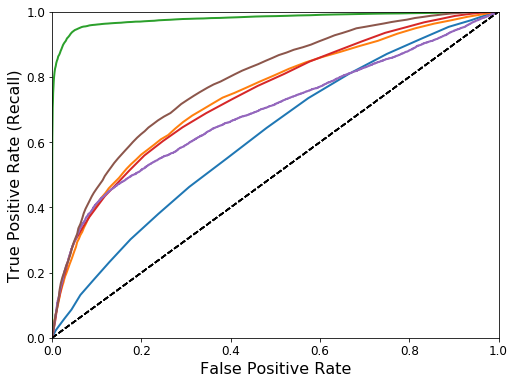

forest with US ROC auc 0.979114492363994
forest without US ROC auc 0.7426896974884878
KNN with US ROC auc 0.7415137833384895
KNN without US ROC auc 0.6164333903979706
Logistic with US ROC auc 0.689498452412376
forest with DS ROC auc 0.787925629013484


In [272]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plot_roc_curve(fpr2, tpr2)
plot_roc_curve(fpr3, tpr3)
plot_roc_curve(fpr4, tpr4)
plot_roc_curve(fpr5, tpr5)
plot_roc_curve(fpr6, tpr6)
# save_fig("roc_curve_plot")
plt.show()


print('forest with US ROC auc',roc_auc_score(default_trian_US_label, forest_y_scores_US[:,1]))
print('forest without US ROC auc',roc_auc_score(default_trian_label, forest_y_scores[:,1]))
print('KNN with US ROC auc',roc_auc_score(default_trian_US_label, KNN_y_scores_US[:,1]))
print('KNN without US ROC auc',roc_auc_score(default_trian_label, KNN_y_scores[:,1]))
print('Logistic with US ROC auc',roc_auc_score(default_trian_US_label, log_y_scores_US[:,1]))
print('forest with DS ROC auc',roc_auc_score(default_trian_DS_label, forest_y_scores_DS[:,1]))

## PR Curve

In [167]:
from sklearn.metrics import precision_recall_curve
KNN_precisions, KNN_recalls, KNN_thresholds = precision_recall_curve(default_trian_label, KNN_y_scores[:,1])
forest_precisions, forest_recalls, forest_thresholds = precision_recall_curve(default_trian_label, forest_y_scores[:,1]) # USE POSITIVE CLASS
forest_precisions_US, forest_recalls_US, forest_thresholds_US = precision_recall_curve(default_trian_US_label, forest_y_scores_US[:,1]) # USE POSITIVE CLASS
forest_precisions_DS, forest_recalls_DS, forest_thresholds_DS = precision_recall_curve(default_trian_DS_label, forest_y_scores_DS[:,1]) # USE POSITIVE CLASS

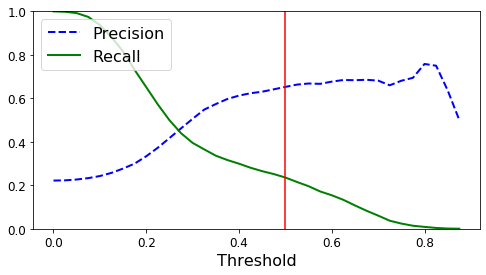

In [116]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, vl=0):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.axvline(vl, c='r')
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(KNN_precisions, KNN_recalls, KNN_thresholds, vl = 0.5)
# plt.xlim([-200000, 200000])
# save_fig("precision_recall_vs_threshold_plot")
plt.show()

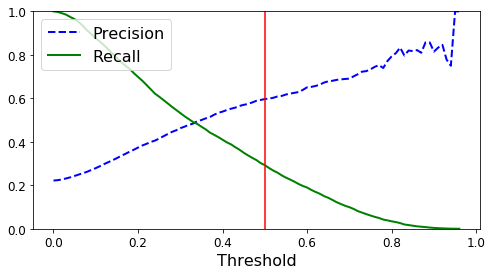

In [117]:


plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(forest_precisions, forest_recalls, forest_thresholds, vl = 0.5)
# plt.xlim([-200000, 200000])
# save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [118]:
from sklearn.metrics import precision_score, recall_score, f1_score
threshold_85_recall = forest_thresholds[np.argmax(forest_recalls<=0.9)]
threshold_85_recall
# df_train_pred_75_recall = (_scores > threshold_90_precision)
# df_train_pred_forest = cross_val_predict(forest_clf, )
pscore = precision_score(default_trian_label, (forest_y_scores[:,1]>threshold_85_recall))
rscore = recall_score(default_trian_label, (forest_y_scores[:,1]>threshold_85_recall))
print(threshold_85_recall)
print(pscore)
print(rscore)


0.09
0.27904055509032183
0.8763854969002443


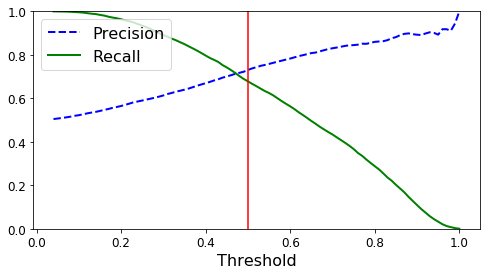

In [168]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(forest_precisions_DS, forest_recalls_DS, forest_thresholds_DS, vl = 0.5)
# plt.xlim([-200000, 200000])
# save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [181]:
from sklearn.metrics import precision_score, recall_score, f1_score
threshold_80_recall = forest_thresholds_DS[np.argmax(forest_recalls_DS<=0.80)]
threshold_80_recall
# df_train_pred_75_recall = (_scores > threshold_90_precision)
# df_train_pred_forest = cross_val_predict(forest_clf, )
pscore = precision_score(default_trian_DS_label, (forest_y_scores_DS[:,1]>threshold_80_recall))
rscore = recall_score(default_trian_DS_label, (forest_y_scores_DS[:,1]>threshold_80_recall))
print(threshold_80_recall)
print(pscore)
print(rscore)


0.4
0.6757149781871061
0.7856471914334022


# Use test set

In [190]:
X_test = df_test.drop("default payment next month", axis=1)
y_test = df_test["default payment next month"].copy()
X_test_prepared = num_pipeline.transform(X_test)
y_test_prepared = ma.make_mask(y_test.values)
y_test_prepared.shape
y_test_prepared.shape

(6000,)

In [183]:
# default_majority = df_test[df_test['default payment next month']==0]
# default_minority = df_test[df_test['default payment next month']==1]
# default_minority.shape
# df_minority_upsampled = resample(default_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=default_majority.shape[0],    # to match majority class
#                                  random_state=42) # reproducible results
# df_test_upsampled = pd.concat([default_majority, df_minority_upsampled])
# df_test_upsampled['default payment next month'].value_counts()

In [184]:
# X_test = df_test_upsampled.drop("default payment next month", axis=1)
# y_test = df_test_upsampled["default payment next month"].copy()
# X_test_prepared = num_pipeline.transform(X_test)
# y_test_prepared = ma.make_mask(y_test.values)
# y_test_prepared

In [186]:
y_proba = forest_clf_DS.predict_proba(X_test_prepared)
y_proba 
# Accuracy of positive predictions
print(precision_score(y_test_prepared, (y_proba[:,1]>=threshold_80_recall)))

# True positive rate (share of true positives correctly identified)
print(recall_score(y_test_prepared, (y_proba[:,1]>=threshold_80_recall)))

0.31963746223564954
0.8057882711348058


#### Conclusions?

In [163]:
for i in range (6,21):
   print(i) 
    

6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Explain your results and choices

Q2. (Optional) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion. 

### Conclusions


### Submit your notebook

Submit your solution here
https://goo.gl/forms/VKD7Zwu54oHjutDc2
Make sure you rename your notebook to    
W3_UTORid.ipynb    
Example W3_adfasd01.ipynb
